<a href="https://colab.research.google.com/github/teffakin/hw/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [6]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [8]:
pd.Series(y_train.flatten()).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
y_train[0]

9

In [12]:
classes[int(y_train[0])]

'Ankle boot'

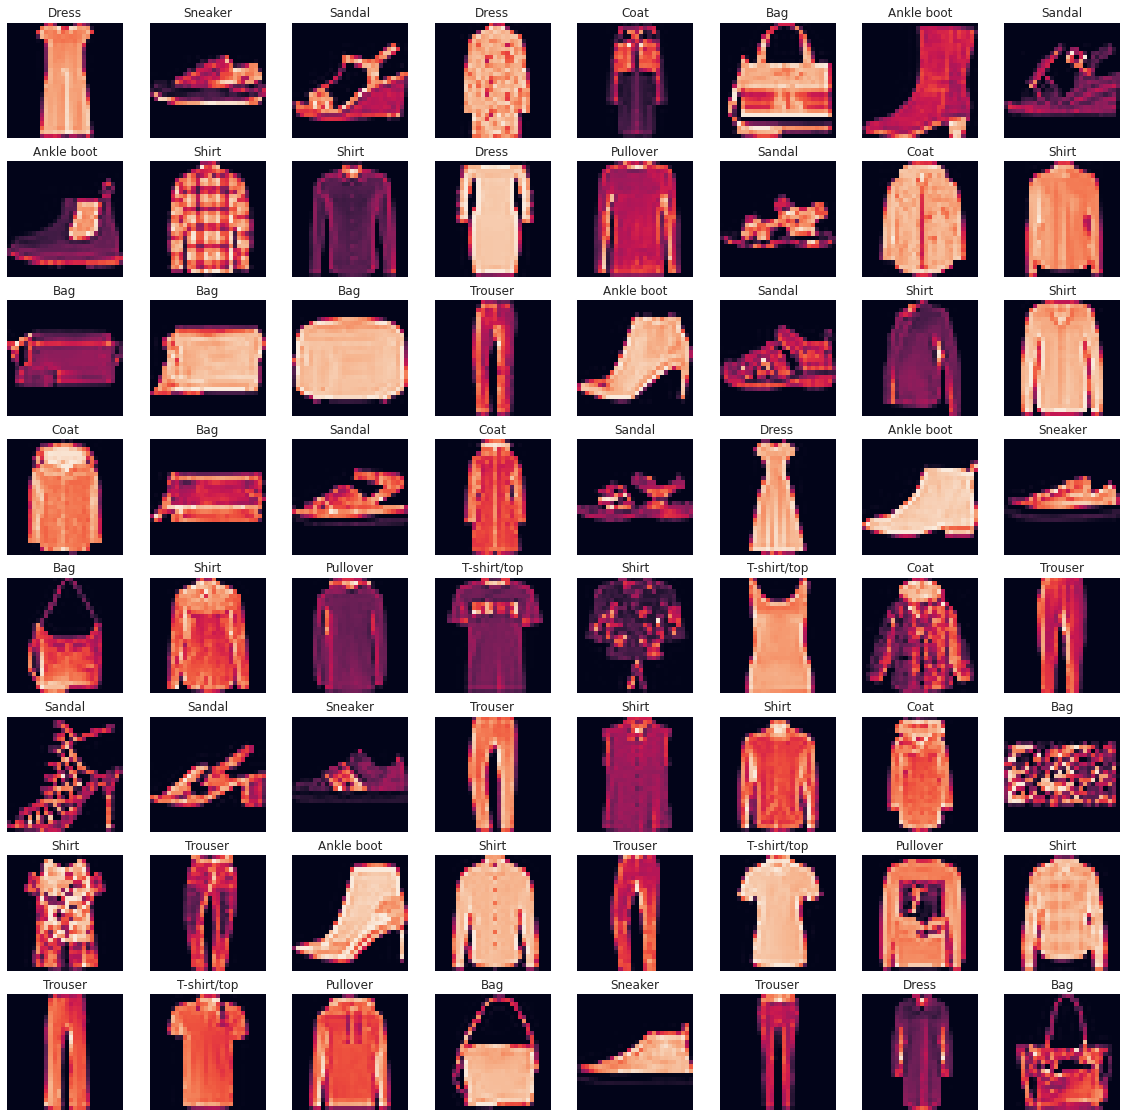

In [13]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

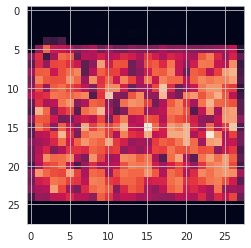

In [15]:
plt.imshow(X_train[23])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [16]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [23]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                      

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [27]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 20s 4ms/step - loss: 0.3920 - accuracy: 0.8618 - val_loss: 0.3011 - val_accuracy: 0.8933
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2578 - accuracy: 0.9081 - val_loss: 0.2890 - val_accuracy: 0.9000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2219 - accuracy: 0.9218 - val_loss: 0.2677 - val_accuracy: 0.9063
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1979 - accuracy: 0.9295 - val_loss: 0.3415 - val_accuracy: 0.8976
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1841 - accuracy: 0.9355 - val_loss: 0.3387 - val_accuracy: 0.8958


**TASK 7: Plot values of metrics you used in your model.**

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.392,0.862,0.301,0.893
1,0.258,0.908,0.289,0.900
2,0.222,0.922,0.268,0.906
3,0.198,0.929,0.341,0.898
4,0.184,0.936,0.339,0.896


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [30]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [31]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.9063


[0.2676798701286316, 0.9063000082969666]

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2676798701286316
Test accuracy: 0.9063000082969666


In [33]:
pred_prob = model.predict(X_test)
pred_prob

array([[4.3913971e-08, 1.1097214e-09, 1.5377320e-07, ..., 3.6584161e-04,
        3.9352989e-07, 9.9914873e-01],
       [1.8001701e-09, 2.9480182e-16, 9.9999893e-01, ..., 4.3812680e-18,
        8.1346805e-16, 3.3104057e-21],
       [9.2301493e-11, 1.0000000e+00, 8.5180350e-14, ..., 1.7741908e-09,
        3.4792960e-15, 3.9624806e-13],
       ...,
       [4.3273741e-07, 3.7930255e-13, 3.6954230e-08, ..., 8.1724898e-11,
        9.9999678e-01, 3.7088102e-12],
       [3.4309098e-09, 1.0000000e+00, 8.8524162e-12, ..., 1.0306161e-08,
        1.3347284e-13, 4.1032976e-11],
       [3.6561428e-04, 1.0512919e-05, 1.2634420e-02, ..., 8.3470754e-02,
        2.4501828e-02, 2.4972020e-02]], dtype=float32)

In [34]:
pred_prob[23]

array([3.5145956e-10, 2.3532847e-15, 3.8156194e-09, 5.7891409e-14,
       4.7661253e-10, 9.9996197e-01, 1.1164511e-08, 2.3868763e-06,
       2.0216685e-06, 3.3592991e-05], dtype=float32)

In [35]:
np.argmax(pred_prob[0])

9

In [36]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [37]:
y_pred.shape

(10000,)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.90      0.81      0.85      1000
           3       0.92      0.90      0.91      1000
           4       0.81      0.88      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.74      0.73      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [39]:
print(confusion_matrix(y_test, y_pred))

[[861   1  11  17   4   2 100   0   4   0]
 [  2 982   0   8   3   0   4   0   1   0]
 [ 15   1 810   8  84   0  82   0   0   0]
 [ 15  12   4 897  41   0  29   0   2   0]
 [  0   1  36  18 884   0  59   0   2   0]
 [  0   0   0   0   0 974   0  17   0   9]
 [117   1  43  27  67   0 741   0   4   0]
 [  0   0   0   0   0   4   0 981   1  14]
 [  2   3   0   4   6   2   4   4 974   1]
 [  0   0   0   0   0   5   1  35   0 959]]


In [40]:
(y_test != y_pred).sum()

937

## Prediction

In [41]:
my_number = X_test[43]

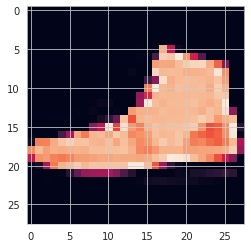

In [42]:
plt.imshow(my_number.reshape(28,28));

In [43]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[1.7221325e-07, 4.6161674e-08, 1.7933638e-06, 3.4063379e-09,
        1.2102817e-06, 1.2515007e-04, 2.1454994e-06, 9.6496594e-01,
        7.4005015e-08, 3.4903441e-02]], dtype=float32)

In [44]:
y_pred = np.argmax(pred_prob)
y_pred

7

In [45]:
model.save("cnn-1.h5")
model=tf.keras.models.load_model('cnn-1.h5')

In [46]:
pred=model.predict(np.expand_dims(X_test[25],axis=0))

In [47]:
np.argmax(pred)

6

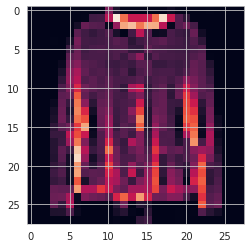

In [48]:
plt.imshow(X_test[25].reshape(28,28))

Class names:

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___